# Overview
- At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.
- Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?
- In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.



# Evaluation
- Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.
- Submission File
- For each Id in the test set, you must make a binary prediction of the target variable. The file should contain a header and have the following 
- format:
```
 ID_code, target
  test_0,    0
  test_1,    1
  test_2,    0
  etc.
```



# Data Description
- You are provided with an anonymized dataset containing numeric feature variables, the binary target column, and a string ID_code column.
- The task is to predict the value of target column in the test set.



# File descriptions
- train.csv - the training set.
- test.csv - the test set. The test set contains some rows which are not included in scoring.
- sample_submission.csv - a sample submission file in the correct format.

# Data Load

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns

In [13]:
import os
print(os.getcwd())
print(os.listdir('../data'))

D:\Data\kaggle compition data\Santander Customer Transaction Prediction\eda
['sample_submission.csv', 'test.csv', 'train.csv']


# Data Structure Confirm

In [25]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [26]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [60]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [58]:
train.dtypes.value_counts()

float64    200
object       1
int64        1
dtype: int64

In [59]:
 test.dtypes.value_counts()

float64    200
object       1
dtype: int64

In [54]:
train.shape, test.shape

((200000, 202), (200000, 201))

In [55]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

# Data Distribution Confirm

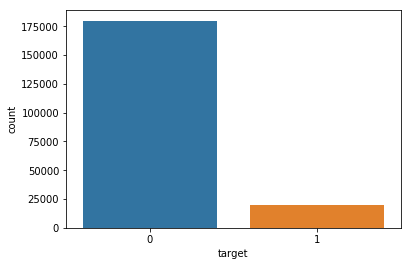

In [68]:
sns.countplot(x='target', data=train)